                 Website Domain  No of News Articles
0          www.etfdailynews.com                16746
1         www.globenewswire.com                 5423
2  economictimes.indiatimes.com                 5310
3        www.globalsecurity.org                 3119
4                www.forbes.com                 2784
5   timesofindia.indiatimes.com                 2194
6                abcnews.go.com                 2058
7       www.businessinsider.com                 2034
8                 www.bbc.co.uk                 2032
9                   punchng.com                 1800


<Figure size 1000x600 with 0 Axes>

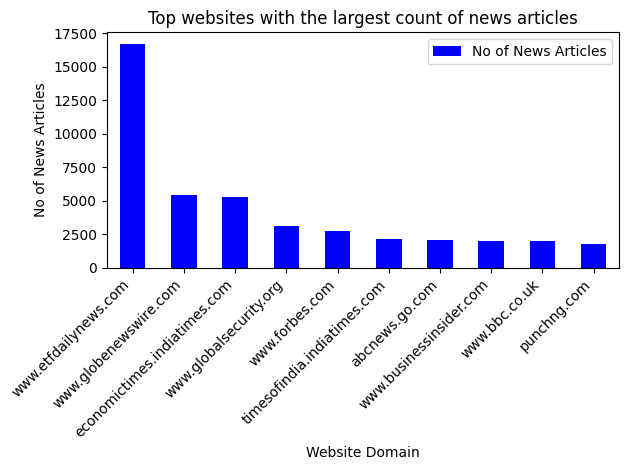

In [1]:
import sys, os
if os.path.abspath("..") not in sys.path:
    sys.path.insert(0, os.path.abspath(".."))

import matplotlib.pyplot as plt
import pandas as pd

from src.utils import find_top_websites
from src.loader import NewsDataLoader

loader = NewsDataLoader() # type: ignore
news_data = loader.load_data('../data/rating.csv') # type: ignore

top_websites = find_top_websites(news_data)
top_websites_df = pd.DataFrame(top_websites, columns=['Website Domain', 'No of News Articles']) # Convert list to DataFrame

print(top_websites_df)

#ploting the date ;;; hope this works
plt.figure(figsize=(10,6))
top_websites_df.plot(kind='bar', x='Website Domain', y='No of News Articles', color='blue') # Plot DataFrame
plt.title('Top websites with the largest count of news articles')
plt.xlabel('Website Domain')
plt.ylabel('No of News Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [2]:
top_websites = news_data.groupby('source_name')['article_id'].count().sort_values(ascending=False).head(10)
bottom_websites = news_data.groupby('source_name')['article_id'].count().sort_values(ascending=True).head(10)

print("Top 10 Websites:")
print(top_websites)
print("\nBottom 10 Websites:")
print(bottom_websites)

Top 10 Websites:
source_name
ETF Daily News        16746
The Times of India     7504
GlobeNewswire          5423
Globalsecurity.org     3119
Forbes                 2784
BBC News               2113
ABC News               2058
Business Insider       2034
The Punch              1800
Al Jazeera English     1664
Name: article_id, dtype: int64

Bottom 10 Websites:
source_name
AllAfrica - Top Africa News     20
The Verge                      214
CNN                            267
Wired                          270
Euronews                       286
ReadWrite                      324
Gizmodo.com                    388
Android Central                522
Time                           600
CNA                            674
Name: article_id, dtype: int64


In [3]:
# Read data from the CSV file
traffic_data = pd.read_csv('../data/traffic.csv')  

# Calculate combined visitor traffic metric
traffic_data['VisitorTraffic'] = traffic_data['RefSubNets'] + traffic_data['RefIPs']

# Sort DataFrame by visitor traffic in descending order
data_sorted = traffic_data.sort_values(by='VisitorTraffic', ascending=False)

# Display the top websites with the highest visitor traffic
top_websites_traffic = data_sorted[['Domain', 'VisitorTraffic']].head(10)
print(top_websites_traffic)

                  Domain  VisitorTraffic
1           facebook.com         2716055
0             google.com         2622632
2            youtube.com         2273574
3            twitter.com         2162112
4          instagram.com         1962831
5           linkedin.com         1656473
8   googletagmanager.com         1117958
9          wikipedia.org         1077996
6              apple.com         1068381
10         wordpress.org         1066657


Countries with the highest number of news media organizations considering the top 10 countries:
Country
United States     14111
United Kingdom     1950
Italy              1810
France             1041
Russia             1024
Canada              887
Germany             884
China               780
Turkey              725
India               686
Name: count, dtype: int64


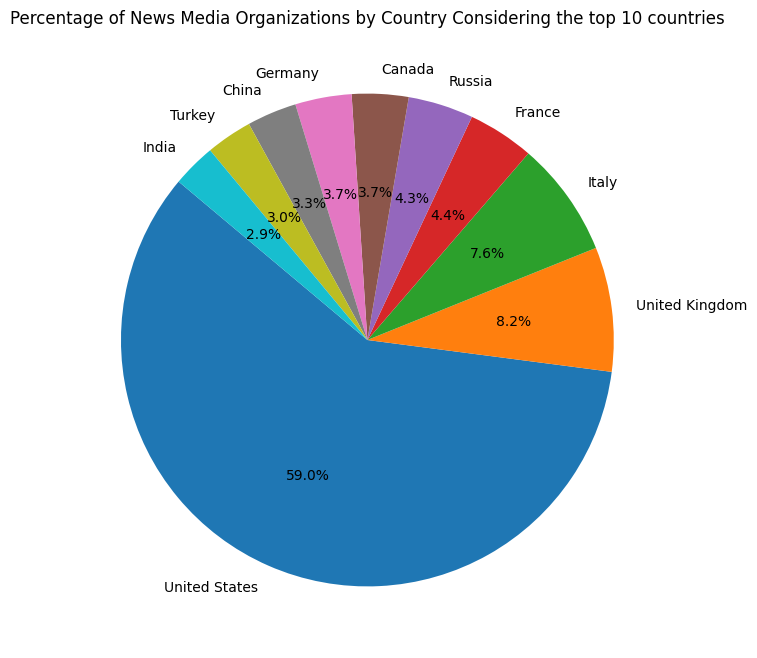

In [5]:

# Read data from the CSV file
domain_location_data = pd.read_csv('../data/domains_location.csv')

# Count the occurrences of each country
country_counts = domain_location_data['Country'].value_counts().head(10)

# Display countries with the highest number of news media organizations
print("Countries with the highest number of news media organizations considering the top 10 countries:")
print(country_counts)

# Plot a pie chart showing the percentage of news media organizations for each country
plt.figure(figsize=(8, 8))
country_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Percentage of News Media Organizations by Country Considering the top 10 countries')
plt.ylabel('')  # Remove the ylabel
plt.show()


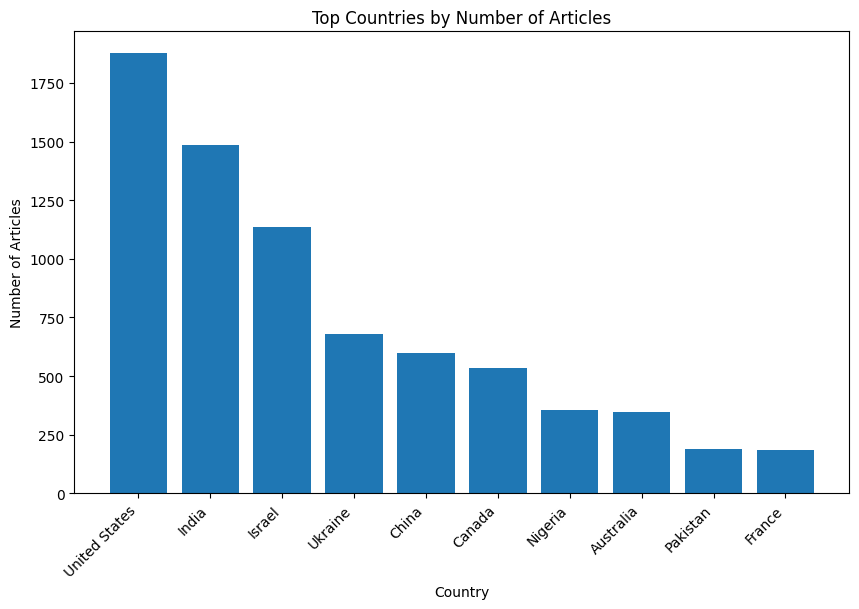

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import pycountry
from collections import defaultdict

# Load the data

# Function to extract countries from text
def extract_countries(text):
    countries = []
    for word in text.split():
        try:
            country = pycountry.countries.get(name=word).name
            countries.append(country)
        except (KeyError, AttributeError):
            if word.lower() in ['us', 'usa', 'united states', 'america']:
                countries.append('United States')
    return countries

# Apply the country extraction function to the 'content' column
news_data['countries'] = news_data['content'].apply(extract_countries)

# Count the occurrences of each country
country_counts = defaultdict(int)
for countries in news_data['countries']:
    for country in countries:
        country_counts[country] += 1

# Sort the countries by article count and display the top 10
sorted_counts = sorted(country_counts.items(), key=lambda x: x[1], reverse=True)
top_countries = [country for country, count in sorted_counts[:10]]
top_counts = [count for country, count in sorted_counts[:10]]

# Visualize the results
plt.figure(figsize=(10, 6))
plt.bar(top_countries, top_counts)
plt.xlabel('Country')
plt.ylabel('Number of Articles')
plt.title('Top Countries by Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.show()

In [8]:
def check_region_keywords(content, regions):
    for region in regions:
        if region.lower() in content.lower():
            return region
    return None


# Define the regions

# Assuming 'news_data' is your DataFrame
regions = ['Africa', 'United States', 'China', 'European Union', 'Russia', 'Ukraine', 'Middle East']
news_data['region'] = news_data['content'].apply(lambda x: check_region_keywords(x, regions))

region_article_counts = news_data.groupby(['source_name', 'region'])['article_id'].count().unstack(fill_value=0)



for region in regions:
    top_region_websites = region_article_counts.sort_values(by=region, ascending=False)[region].head(10)
    print(f"Top websites with articles about {region}:")
    print(top_region_websites)
    print()


Top websites with articles about Africa:
source_name
The Punch             158
The Times of India    144
RT                     69
Marketscreener.com     43
BBC News               42
Al Jazeera English     38
Globalsecurity.org     32
ABC News               32
CNA                    31
GlobeNewswire          29
Name: Africa, dtype: int64

Top websites with articles about United States:
source_name
GlobeNewswire                   376
Globalsecurity.org              168
Al Jazeera English              135
The Times of India               60
ABC News                         51
Forbes                           33
International Business Times     26
ETF Daily News                   25
The Punch                        24
Phys.Org                         21
Name: United States, dtype: int64

Top websites with articles about China:
source_name
Globalsecurity.org              199
The Times of India              110
ETF Daily News                   86
GlobeNewswire                    62
CNA     

In [9]:
import pandas as pd

# Assuming 'news_data' is your DataFrame
def check_region_keywords(content, regions):
    for region in regions:
        if region.lower() in content.lower():
            return region
    return None

regions = ['Africa', 'United States', 'China', 'European Union', 'Russia', 'Ukraine', 'Middle East']
news_data['region'] = news_data['content'].apply(lambda x: check_region_keywords(x, regions))

region_article_counts = news_data.groupby(['source_name', 'region'])['article_id'].count().unstack(fill_value=0)

for region in regions:
    top_region_websites = region_article_counts.sort_values(by=region, ascending=False)[region].head(10)
    print(f"Top websites with articles about {region}:")
    print(top_region_websites)
    print()

Top websites with articles about Africa:
source_name
The Punch             158
The Times of India    144
RT                     69
Marketscreener.com     43
BBC News               42
Al Jazeera English     38
Globalsecurity.org     32
ABC News               32
CNA                    31
GlobeNewswire          29
Name: Africa, dtype: int64

Top websites with articles about United States:
source_name
GlobeNewswire                   376
Globalsecurity.org              168
Al Jazeera English              135
The Times of India               60
ABC News                         51
Forbes                           33
International Business Times     26
ETF Daily News                   25
The Punch                        24
Phys.Org                         21
Name: United States, dtype: int64

Top websites with articles about China:
source_name
Globalsecurity.org              199
The Times of India              110
ETF Daily News                   86
GlobeNewswire                    62
CNA     

In [12]:

# Assuming 'news_data' is your DataFrame
print(news_data['title_sentiment'].unique())  # Check the unique values in the 'title_sentiment' column

# Convert 'title_sentiment' to numeric, handling non-numeric values
if news_data['title_sentiment'].dtype != 'float64' and news_data['title_sentiment'].dtype != 'int64':
    # If the column is not numeric, try to map the values first
    sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
    news_data['title_sentiment'] = news_data['title_sentiment'].map(sentiment_mapping)

    # Then convert the column to numeric, filling missing values with 0
    news_data['title_sentiment'] = pd.to_numeric(news_data['title_sentiment'], errors='coerce').fillna(0)

# Group by source_name and calculate sentiment statistics
sentiment_stats = news_data.groupby('source_name')['title_sentiment'].agg(['mean', 'median', 'var']).sort_values(by='mean', ascending=False)

# Find the top websites for positive, neutral, and negative sentiment
top_positive_websites = sentiment_stats.sort_values(by='mean', ascending=False).head(10)
top_neutral_websites = sentiment_stats.sort_values(by='median', ascending=False).head(10)
top_negative_websites = sentiment_stats.sort_values(by='var', ascending=False).head(10)

print("Top Websites by Positive Sentiment:")
print(top_positive_websites)
print("\nTop Websites by Neutral Sentiment:")
print(top_neutral_websites)
print("\nTop Websites by Negative Sentiment:")
print(top_negative_websites)


[ 0  1 -1]
Top Websites by Positive Sentiment:
                        mean  median       var
source_name                                   
Digital Trends      0.463010     1.0  0.358783
Android Central     0.448276     1.0  0.393673
GlobeNewswire       0.161903     0.0  0.145675
Forbes              0.150503     0.0  0.283126
The Verge           0.121495     0.0  0.435874
ReadWrite           0.098765     0.0  0.324581
Marketscreener.com  0.081498     0.0  0.136630
ETF Daily News      0.025797     0.0  0.092019
Wired               0.007407     0.0  0.490651
The Times of India -0.008662     0.0  0.313799

Top Websites by Neutral Sentiment:
                                 mean  median       var
source_name                                            
Digital Trends               0.463010     1.0  0.358783
Android Central              0.448276     1.0  0.393673
Boing Boing                 -0.112202     0.0  0.577281
AllAfrica - Top Africa News -0.400000     0.0  0.252632
BBC News         

                                count        mean        std    min    25%  \
source_name                                                                  
ABC News                       2058.0  213.101069   6.740664  101.0  213.0   
Al Jazeera English             1664.0  212.943510   4.104519  124.0  213.0   
AllAfrica - Top Africa News      20.0  213.350000   0.587143  212.0  213.0   
Android Central                 522.0  213.961686   0.423027  211.0  214.0   
BBC News                       2113.0  212.409371   9.943184   46.0  213.0   
Boing Boing                     713.0  213.502104   0.655837  211.0  213.0   
Business Insider               2034.0  213.211898   0.573935  198.0  213.0   
CNA                             674.0  213.375371   1.247899  198.0  213.0   
CNN                             267.0  213.573034   0.664134  211.0  213.0   
Deadline                        932.0  213.456009   1.075654  198.0  213.0   
Digital Trends                  784.0  213.608418   0.613580  21

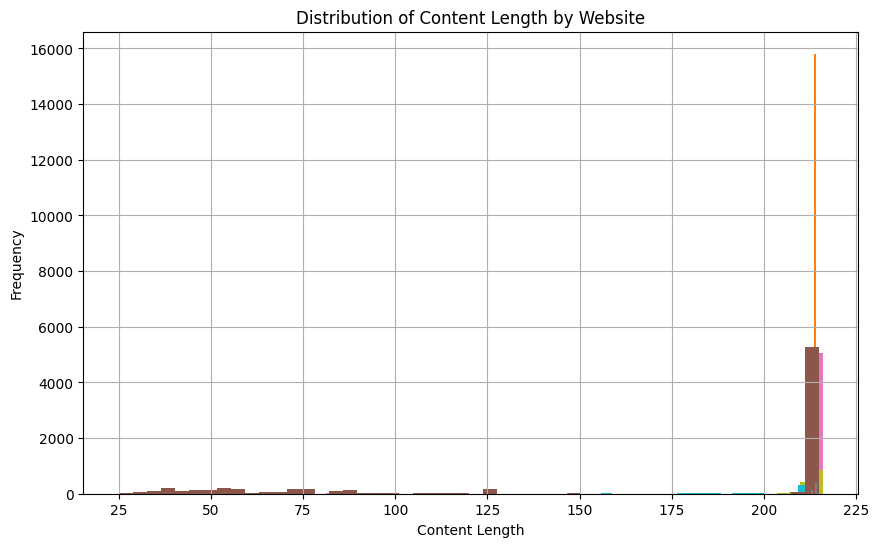

                                count       mean       std  min    25%   50%  \
source_name                                                                    
ABC News                       2058.0  13.480078  2.624784  1.0  12.00  14.0   
Al Jazeera English             1664.0  10.158654  1.866906  2.0   9.00  10.0   
AllAfrica - Top Africa News      20.0   9.950000  2.089447  7.0   8.75  10.0   
Android Central                 522.0  12.243295  2.884901  4.0  10.00  12.0   
BBC News                       2113.0   9.342168  1.776799  3.0   8.00   9.0   
Boing Boing                     713.0  12.150070  4.025017  3.0   9.00  12.0   
Business Insider               2034.0  18.022616  5.182501  2.0  15.00  18.0   
CNA                             674.0  10.954006  2.667724  5.0   9.00  11.0   
CNN                             267.0  13.235955  3.666622  3.0  11.00  13.0   
Deadline                        932.0  15.516094  4.975640  6.0  12.00  15.0   
Digital Trends                  784.0  1

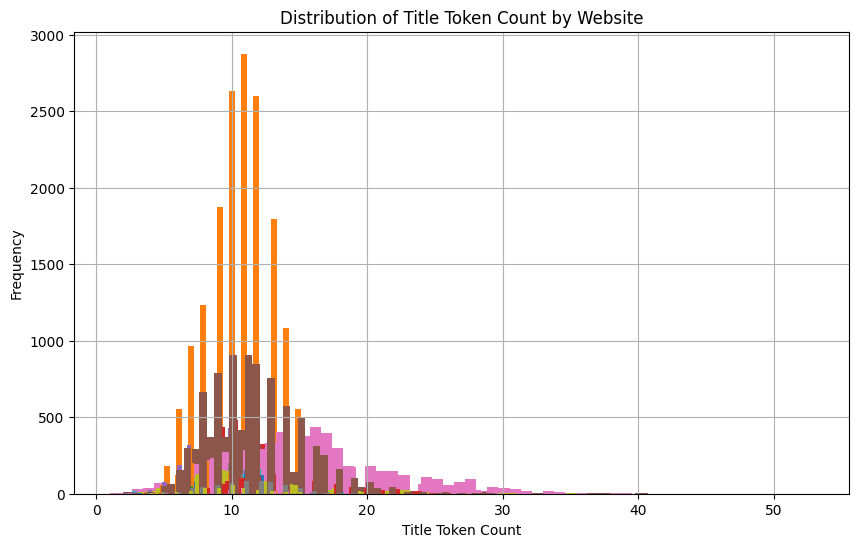

In [13]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'news_data' is your DataFrame

# Calculate 'content_length' and 'title_token_count'
news_data['content_length'] = news_data['content'].str.len()
news_data['title_token_count'] = news_data['title'].str.split().str.len()

# Compare the raw message lengths across sites
content_length_stats = news_data.groupby('source_name')['content_length'].describe()
print(content_length_stats)

# Check the distribution of raw message lengths among sites
news_data.groupby('source_name')['content_length'].hist(bins=50, figsize=(10, 6))
plt.xlabel('Content Length')
plt.ylabel('Frequency')
plt.title('Distribution of Content Length by Website')
plt.show()

# Compare the number of words in the title across sites
title_token_count_stats = news_data.groupby('source_name')['title_token_count'].describe()
print(title_token_count_stats)

# Check the distribution of the number of words in the title among sites
news_data.groupby('source_name')['title_token_count'].hist(bins=50, figsize=(10, 6))
plt.xlabel('Title Token Count')
plt.ylabel('Frequency')
plt.title('Distribution of Title Token Count by Website')
plt.show()


C:\Users\Jonny\AppData\Local\Temp\ipykernel_9380\3484547489.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['GlobalRank'].fillna(median_rank, inplace=True)


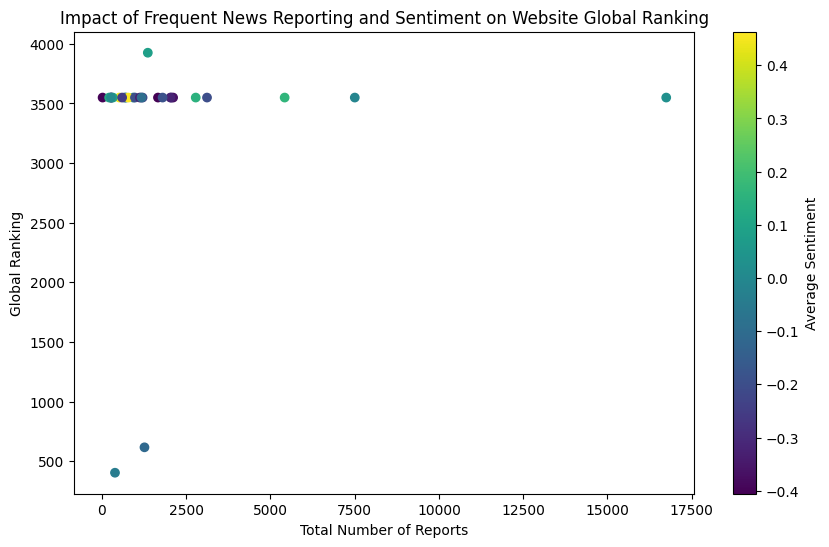

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded the 'news_data' and 'traffic_data' datasets

# Merge the datasets on the common 'Domain' column
merged_data = pd.merge(news_data, traffic_data, left_on='source_name', right_on='Domain', how='left')

# Convert source_name and Domain columns to string data type
merged_data['source_name'] = merged_data['source_name'].astype(str)
merged_data['Domain'] = merged_data['Domain'].astype(str)

# Clean and preprocess the source_name and Domain columns
merged_data['source_name'] = merged_data['source_name'].str.strip().str.lower()
merged_data['Domain'] = merged_data['Domain'].str.strip().str.lower()

# Check if there are any null values in the GlobalRank column
if merged_data['GlobalRank'].isnull().any():
    # Fill null values with the median global ranking
    median_rank = merged_data['GlobalRank'].median()
    merged_data['GlobalRank'].fillna(median_rank, inplace=True)

# Group merged_data by source_name and calculate the total number of reports, average sentiment, and median sentiment
grouped_data = merged_data.groupby('source_name').agg({
    'article_id': 'count',
    'title_sentiment': ['mean', 'median'],
    'GlobalRank': 'first'
}).reset_index()

# Rename the columns
grouped_data.columns = ['Domain', 'total_reports', 'avg_sentiment', 'median_sentiment', 'global_ranking']

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['total_reports'], grouped_data['global_ranking'], c=grouped_data['avg_sentiment'])
plt.xlabel('Total Number of Reports')
plt.ylabel('Global Ranking')
plt.title('Impact of Frequent News Reporting and Sentiment on Website Global Ranking')
plt.colorbar(label='Average Sentiment')
plt.show()